Step 1: Loading and preprocessing data... 🔄
Data preprocessing complete! ✅

Step 2: Splitting data into training and testing sets... 🔪
Training set size: 36168 samples
Testing set size: 9043 samples

Step 3: Training the Decision Tree model... 🌳
Model training complete! ✅

Step 4: Evaluating the model's performance... 📊
Model Accuracy: 0.8995

Classification Report:
              precision    recall  f1-score   support

 No Purchase       0.91      0.98      0.95      7985
    Purchase       0.65      0.31      0.42      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043


Confusion Matrix:


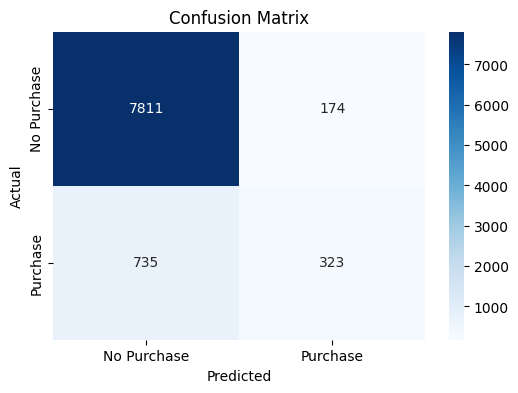


Step 5: Visualizing the decision tree... 🎨


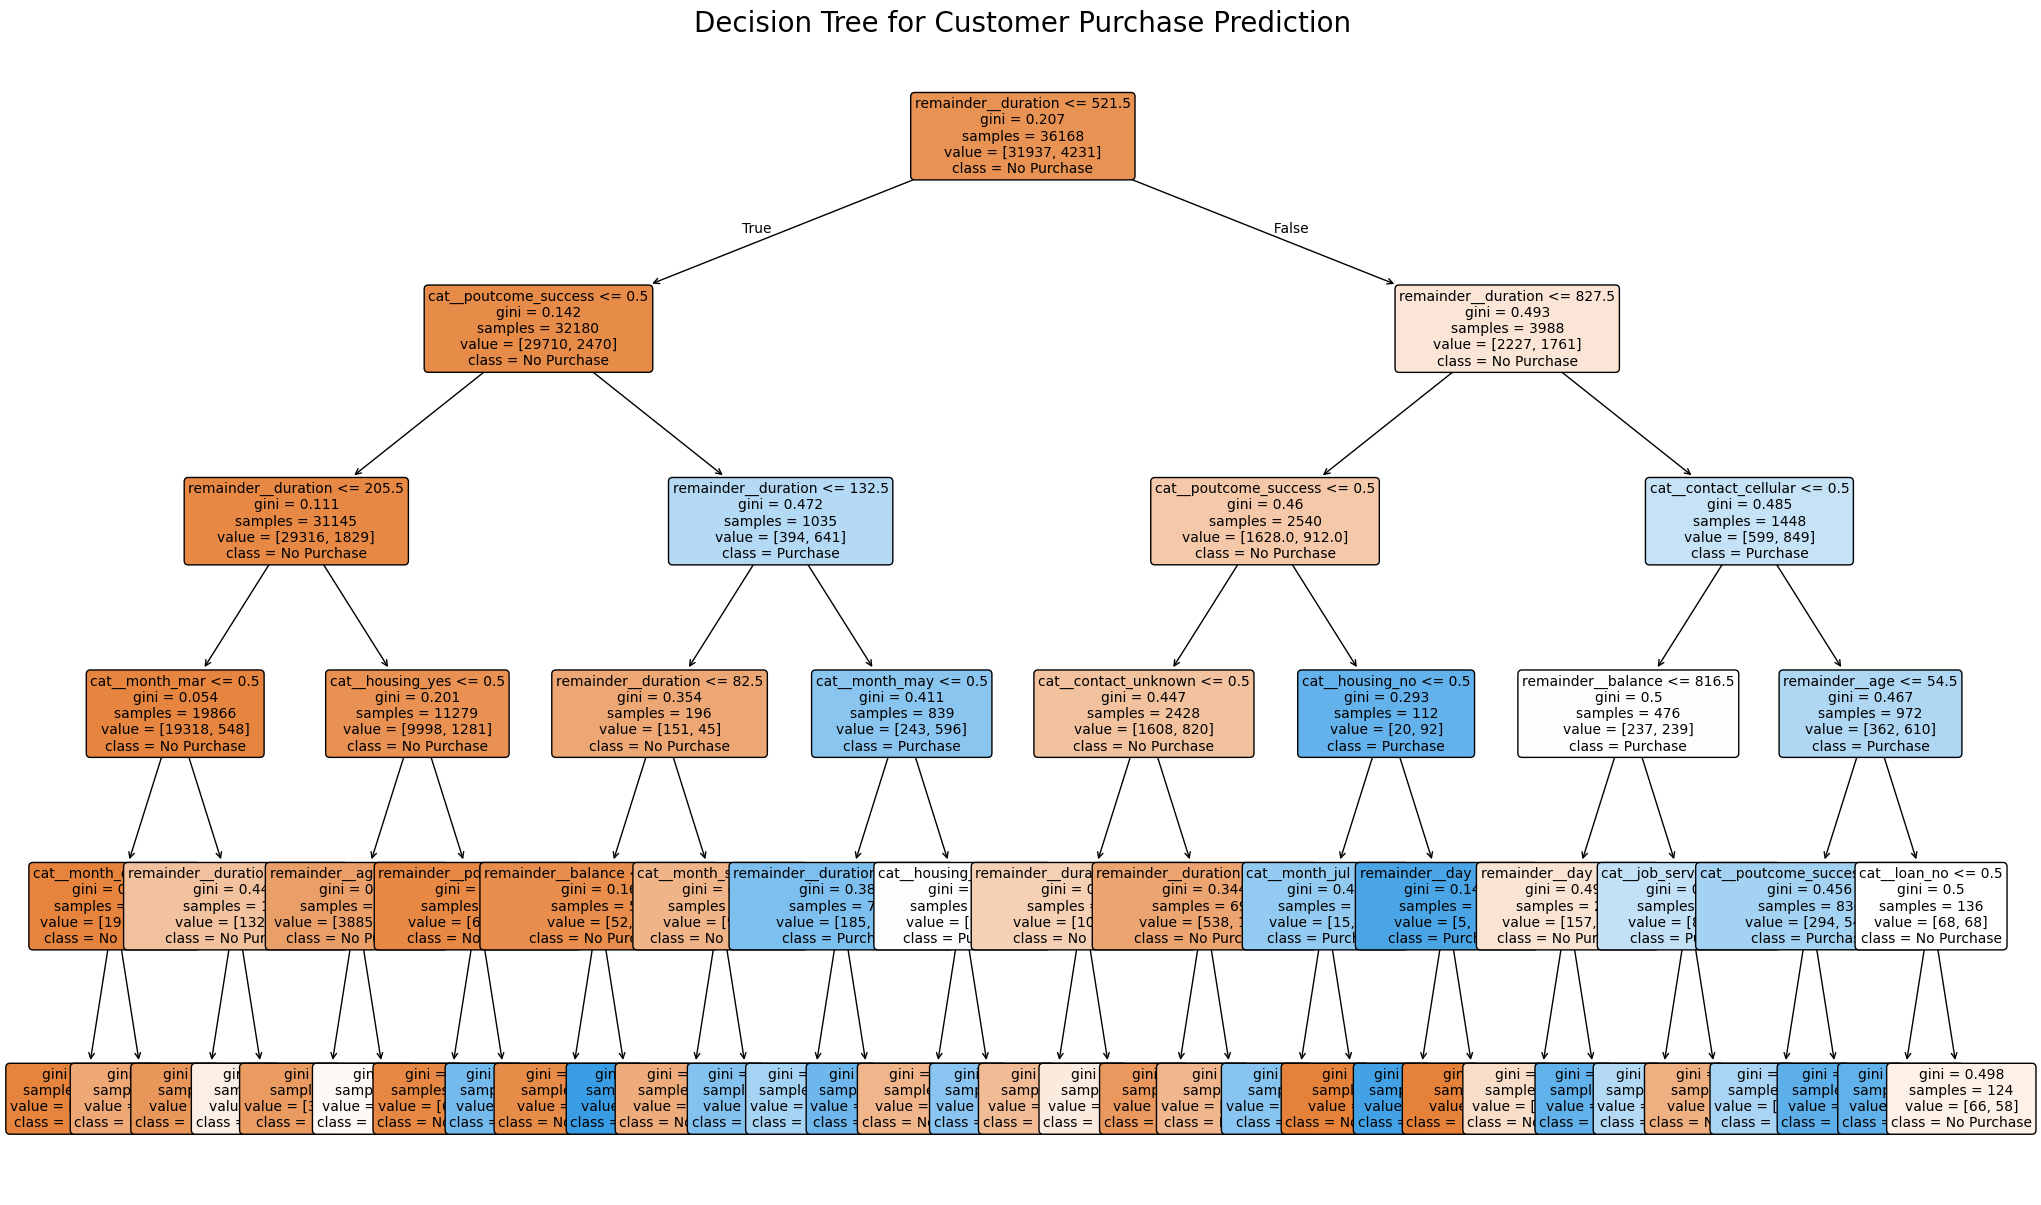

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------------------------------------------------
# 1. DATA LOADING & PREPROCESSING
# -------------------------------------------------------------------
print("Step 1: Loading and preprocessing data... 🔄")

# Load the dataset directly from your 'bank-full.csv' file.
# The dataset from UCI typically uses semicolons as separators.
df = pd.read_csv('bank-full.csv', sep=';')

# Separate features (X) from the target variable (y)
X = df.drop('y', axis=1)
# Convert the target variable 'y' into numerical format (0 for 'no', 1 for 'yes')
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Identify categorical features that need encoding
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessor object using ColumnTransformer.
# This applies OneHotEncoder to categorical columns and leaves numerical columns untouched.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns (e.g., age, balance)
)

# Apply the preprocessing to the feature data
X_processed = preprocessor.fit_transform(X)
print("Data preprocessing complete! ✅")

# -------------------------------------------------------------------
# 2. DATA SPLITTING
# -------------------------------------------------------------------
print("\nStep 2: Splitting data into training and testing sets... 🔪")

# Split the data into 80% for training and 20% for testing
# `stratify=y` ensures the proportion of 'yes'/'no' is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# -------------------------------------------------------------------
# 3. MODEL TRAINING
# -------------------------------------------------------------------
print("\nStep 3: Training the Decision Tree model... 🌳")

# Initialize the Decision Tree Classifier
# `max_depth` is a hyperparameter to prevent the tree from becoming too complex (overfitting)
# `random_state` ensures reproducibility
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)
print("Model training complete! ✅")

# -------------------------------------------------------------------
# 4. MODEL EVALUATION
# -------------------------------------------------------------------
print("\nStep 4: Evaluating the model's performance... 📊")

# Make predictions on the unseen test data
y_pred = dt_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Purchase', 'Purchase']))

# Generate and display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# -------------------------------------------------------------------
# 5. TREE VISUALIZATION
# -------------------------------------------------------------------
print("\nStep 5: Visualizing the decision tree... 🎨")

# Get the feature names after one-hot encoding for labeling the tree plot
feature_names = preprocessor.get_feature_names_out()

# Plot the trained decision tree
plt.figure(figsize=(25, 15))
plot_tree(
    dt_classifier,
    filled=True,              # Color nodes by majority class
    rounded=True,             # Use rounded corners for nodes
    class_names=['No Purchase', 'Purchase'],
    feature_names=list(feature_names),
    fontsize=10
)
plt.title("Decision Tree for Customer Purchase Prediction", fontsize=20)
plt.show()
